<a href="https://colab.research.google.com/github/hkorneliussen/ACIT4030_Project/blob/main/Framework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#2D and 3D reconstruction of human faces from sketches 
This notebook provides necessary code to implement the framework described in the paper *2D and 3D reconstruction of human faces from sketches*

**NOTE**: Change runtime to GPU (this is needed to run the DECA model)

All code used in this notebook can be found in my github repository for this project: https://github.com/hkorneliussen/ACIT4030_Project 

In [1]:
%%capture
#Cloning github repository
!git clone https://github.com/hkorneliussen/ACIT4030_Project.git

#getting pretrained model, stored in kaggle
!mkdir -p ~/.kaggle
!cp /content/ACIT4030_Project/models/kaggle.json ~/.kaggle/

##Image generation from sketch (pix2pix)
This code block implements image generation from sketches, with the use of a pre-trained pix2pix model implementation. The pre-trained model is trained on a custom made FLICR dataset, consisting of image-sketch pairs.

Results are stored under content/ACIT4030_Project/output. Input images are stored under content/ACIT4030_Project/dataset. To apply the model on costum sketches, those sketches can be added to that directory. 

In [2]:
%%capture
%cd /content
!kaggle datasets download -d hannekorneliussen/pretrained-pix2pix-model
!unzip /content/pretrained-pix2pix-model.zip -d /content/ACIT4030_Project/models

/content/ACIT4030_Project


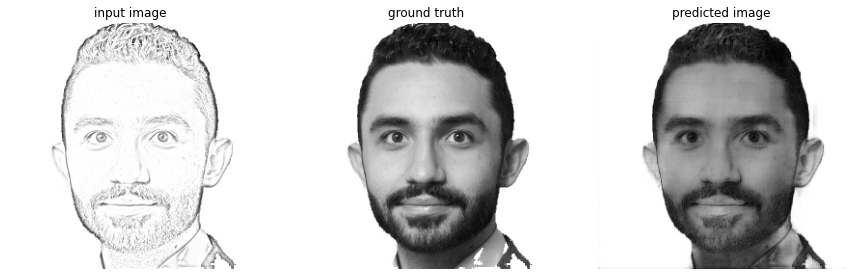

In [3]:
#running 2D image generation (gray scale) script (pix2pix)
%cd /content/ACIT4030_Project
%run pix2pix.py

##Upscaling and resolution
This codeblock implements the up-scaling and resolution part of the framework. The code is based on the superresolution model from openCV.

The code takes the grey-scale output image produced by the pix2pix model as input. Outputs are stored under content/ACIT4030_Project/output. 

In [4]:
%%capture
#downloading resolution model
%cd /content
!kaggle datasets download -d hannekorneliussen/resolution-model
!unzip /content/resolution-model.zip -d /content/ACIT4030_Project/models

#running upscaling and resolution script
%cd /content/ACIT4030_Project
%run resolution.py

##Colorize
This code block adds colour to the image produced by the resolution model above. The code is based on the following implementation: https://emilwallner.medium.com/colorize-b-w-photos-with-a-100-line-neural-network-53d9b4449f8d

The outputs are stored under content/ACIT4030_Project/output

/content/ACIT4030_Project


Downloading: "https://colorizers.s3.us-east-2.amazonaws.com/siggraph17-df00044c.pth" to /root/.cache/torch/hub/checkpoints/siggraph17-df00044c.pth


  0%|          | 0.00/130M [00:00<?, ?B/s]

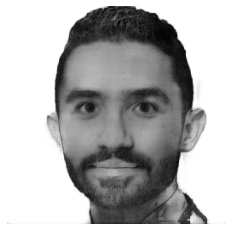

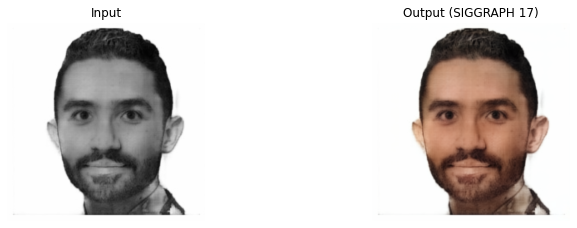

In [5]:
%cd /content/ACIT4030_Project
%run colorize.py -i output/2D_Image_grayscale_upscaled.jpg -o output/

##3D model generation (DECA)
This block generates 3D facial reconstructions and takes the output from the previous model as input. 

The code uses the DECA demo model, which is available on DECAS Github repository: https://github.com/YadiraF/DECA 

Outputs are stored under content/ACIT4030_Project/output/3D. To visualize the generated mesh-object file, a program such as meshlab can be used. 

In [6]:
%%capture
#Installing requirements
!pip install -q kornia==0.4.0 yacs==0.1.8 face_alignment ninja fvcore
!apt -q install -y zip unzip ffmpeg libsm6 libxext6
!pip install 'torch==1.6.0'
!pip install 'torchvision==0.7.0'
!pip install -q 'pytorch3d==0.2.5'
!pip install -q numpy scipy chumpy scikit-image opencv-python PyYAML face-alignment yacs kornia ninja fvcore
!pip install -q lucid>=0.2.3 gdown matplotlib

In [7]:
%%capture
#Downloading DECA data
!mkdir -p /content/ACIT4030_Project/data 
%cd /content
!kaggle datasets download -d hannekorneliussen/deca-data
!unzip /content/deca-data.zip -d /content/ACIT4030_Project/data
#running 3D model script to generate 3D objects
%cd /content/ACIT4030_Project
input_image = "/content/ACIT4030_Project/output/2D_Image_color.jpg" 
output_folder = "output/3D"
!python 3D_model.py -i $input_image -s $output_folder --saveDepth True --saveObj True

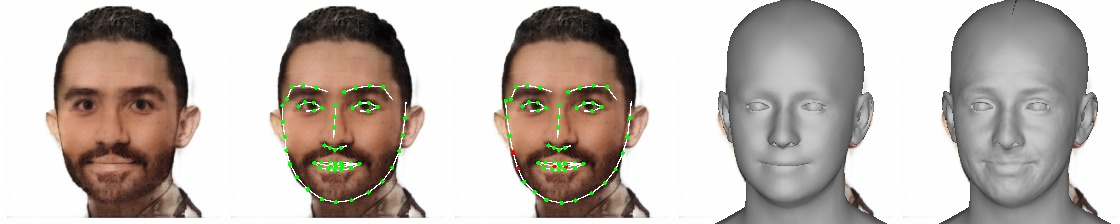

In [8]:
#showing results from DECA model
import cv2 
from google.colab.patches import cv2_imshow
image = cv2.imread("/content/ACIT4030_Project/output/3D/2D_Image_color_vis_original_size.jpg")
cv2_imshow(image)